In [1]:
### qqq

In [2]:
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt

from stumpy import config

import matplotlib.pyplot as plt

auxiliary_codes_path =  ".." + os.sep + "codigo_auxiliares"
sys.path.append(auxiliary_codes_path)
import essencials as es

In [3]:
config.STUMPY_EXCL_ZONE_DENOM = 1/3  # i ± int(np.ceil(m / {1}))
plt.rcParams['font.size'] = 10
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [4]:
# Base Dir ../Dataset
baseDir = os.path.join('..', 'Dataset')

# Seach pacth of MEASURE files
MAIN_LIST_MEASURE = []

# File_name to find
MEASURE_FILE_PATH = 'VD_WORDS_OCCURRENCE.CSV'

MAIN_LIST_MEASURE_local = []

# B1.2 - Collect in YT
baseDir_yt = os.path.join(baseDir, 'YT-Online')

# Call the basic function
MAIN_LIST_MEASURE_yt = es.list_scan_from_path (baseDir_yt, MEASURE_FILE_PATH)

# Join the Two Lists
MAIN_LIST_MEASURE = MAIN_LIST_MEASURE_local + MAIN_LIST_MEASURE_yt

In [5]:
SUB_FILE_NAME = 'VD_SUBTITLES.CSV'
MAIN_LIST_MEASURE_FILTER = []
for current_path in MAIN_LIST_MEASURE:
    path = es.collect_current_path(current_path)
    check, _ = es.check_file_exist(path, SUB_FILE_NAME)
    if check:
        MAIN_LIST_MEASURE_FILTER.append(current_path)  

## Reading all Word Occurrence files

In [7]:
# Select the time-serie
VD_INFO_DT = 'VD_INFO.CSV'
TOTAL = pd.DataFrame()
for current_path in MAIN_LIST_MEASURE_FILTER:
    path_dir = es.collect_current_path(current_path)
    vd_info_path = os.path.join(path_dir, VD_INFO_DT)
    
    vd_info = pd.read_csv(vd_info_path)
    vd_info.drop(columns=['Unnamed: 0'], inplace=True)
    video_id =  vd_info.video_id[0]
    
    try:
        VD_WORDS_OCCURRENCE = pd.read_csv(current_path)
        if 'Unnamed: 0' in VD_WORDS_OCCURRENCE.columns:
            VD_WORDS_OCCURRENCE.drop(columns=['Unnamed: 0'], inplace=True)
            
        VD_WORDS_OCCURRENCE.insert(0, 'video_id', video_id)
        TOTAL = pd.concat([TOTAL, VD_WORDS_OCCURRENCE])
        if VD_WORDS_OCCURRENCE.empty:
            print("O arquivo CSV está vazio.", current_path)
    except pd.errors.EmptyDataError:
        print("O arquivo CSV está vazio.", current_path)       

O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000001/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000012/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000017/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000018/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000022/VD_WORDS_OCCURRENCE.CSV


## Setting word to carry out the search flow

In [8]:
word ='INSIRA_SUA_PALAVRA_AQUI'.upper()
FILTER = TOTAL[TOTAL['selected_word'] == word]
print(f'The Word "{word}" has {len(FILTER)} occurrence')

The Word "INTERVIEW" has 41 occurrence


In [9]:
count_id = FILTER.video_id.value_counts()
FREQUENCY_DT = pd.DataFrame({'video_id': count_id.index, 'amount': count_id.values})

In [10]:
# setting video_id to show the setences in subtitle
video_id = 6
FILTER_ID = FILTER.query(f'video_id=={video_id}')
FILTER_ID = FILTER_ID.rename_axis('id_sentence')

## Plotting a time-serie setence

In [11]:
# Type the setence index
id_sentence = 15

# Select the sentence
FILTER_ID.loc[id_sentence]

video_id                      6
selected_word         INTERVIEW
start_time_seconds        5.279
end_time_seconds            8.0
ini_frame                   131
end_frame                   200
text                  INTERVIEW
Name: 15, dtype: object

In [12]:
# READ VD BLOCKS_WORDS
# generate the path of the video in dataset
VD_BLOCKS_FILE_NAME = 'VD_BLOCKS_WORDS_OCCURRENCE.CSV'

path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_BLOCKS_FILE_NAME)
VD_BLOCKS_WORDS = pd.read_csv(path_video)

In [13]:
VD_BLOCKS_WORDS_FILTER = VD_BLOCKS_WORDS.query(f'block_id=={id_sentence}').reset_index(drop=True)

# Check if there is a discontinuity in the sentence
if VD_BLOCKS_WORDS_FILTER.loc[1:,'gap'].any()==1:
    print('A time series exhibits a discontinuity. Choose another sentence.')
else:
    print('The time series does not exhibit a discontinuity. Proceed with the flow.')

The time series does not exhibit a discontinuity. Proceed with the flow.


In [14]:
# show measures mouth dataframe
SENTENCE_DT = VD_BLOCKS_WORDS_FILTER.iloc[:,[2] + list(range(7, 23))]
SENTENCE_DT = SENTENCE_DT.set_index(pd.Index(SENTENCE_DT['frame_raw']))
SENTENCE_DT.drop(columns=["frame_raw"], inplace=True)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

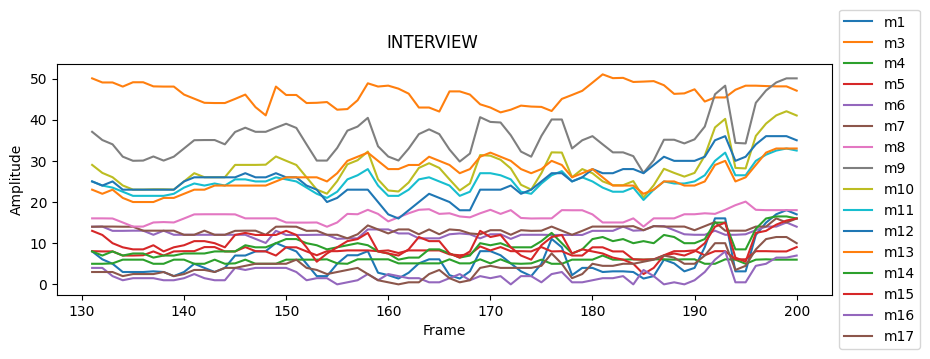

In [15]:
#plot graph
es.plot(SENTENCE_DT, FILTER_ID.loc[id_sentence].text)

## Identifying the word sequence in the sentence time series

In [16]:
# o frame de início e fim foi encontrado a partir de análise visual e auditiva do vídeo
frame_begin = 131
frame_end = frame_begin+15

WORD_DT = SENTENCE_DT.query(f'frame_raw >= {frame_begin} & frame_raw <= {frame_end}')

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

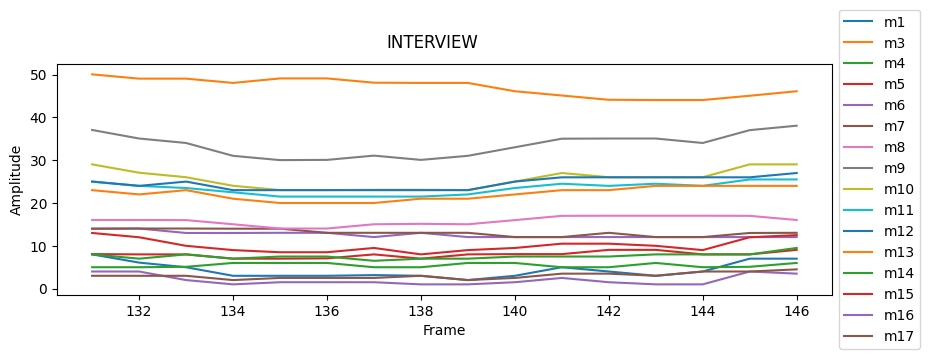

In [17]:
es.plot(WORD_DT, word)

## Analysis of variability in measurements of the selected word.

In [18]:
VD_MEASURE_DT_SUMARY =  WORD_DT.describe().T
VD_MEASURE_DT_SUMARY = VD_MEASURE_DT_SUMARY[['mean', 'std', 'min', 'max']]

# coefficient of variation
VD_MEASURE_DT_SUMARY['CV (%)'] = (VD_MEASURE_DT_SUMARY['std']/VD_MEASURE_DT_SUMARY['mean']) * 100
VD_MEASURE_DT_SUMARY.sort_values(by='CV (%)', ascending=False)

,mean,std,min,max,CV (%)
m16,2.031250,1.175709,1.000000,4.000000,57.881059
m1,4.327815,1.813289,2.000000,8.000000,41.898496
m17,3.031250,0.718070,2.000000,4.500000,23.688918
m15,10.093750,1.540766,8.000000,13.000000,15.264550
m4,5.449877,0.502087,5.000000,6.000000,9.212818
m14,7.593750,0.688446,6.500000,9.500000,9.065960
m10,25.591386,2.240470,23.021729,29.017236,8.754781
m5,7.964000,0.692595,7.000000,9.055385,8.696574
m9,33.537300,2.707922,30.016662,38.052595,8.074360
m13,22.187500,1.515201,20.000000,24.000000,6.829074


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

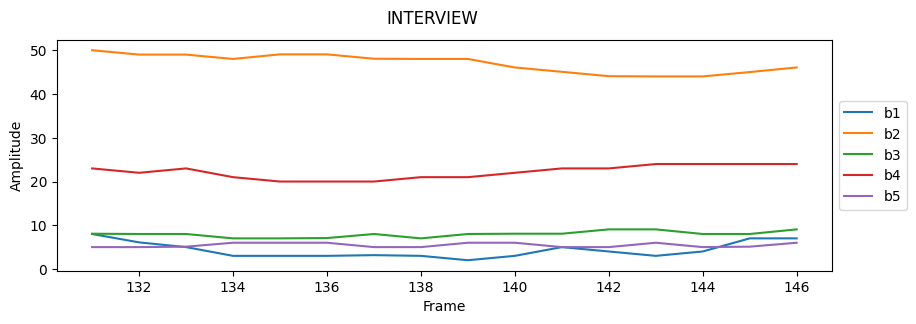

In [19]:
# select best measures to search

new_measures = {'m1': 'b1', 
             'm3': 'b2',
             'm5': 'b3',
             'm13': 'b4',
             'm4': 'b5'}

reference_measures = ['b1', 'b2', 'b3', 'b4', 'b5']
PLOT_DT = WORD_DT.rename(columns=new_measures)
PLOT_DT = PLOT_DT[reference_measures]
es.plot(PLOT_DT, word, f'{word}_word', save_fig=True)

reference_measures = ['m4', 'm3', 'm1']

## Searching word in the sentence

In [20]:
# set the seed
Q_df = WORD_DT[reference_measures]

# set the time-serie
T_df = SENTENCE_DT[reference_measures]

In [21]:
# Busca os padrões na série
c_list = []
for step in range(0,len(Q_df.columns)):
    comp_object = es.Comparing(Q_df[reference_measures[step]], T_df[reference_measures[step]])
    comp_object.calc_matches()
    comp_object.measure_name = reference_measures[step]
    c_list.append(comp_object)

print('Results:')
for c in c_list:
    print(c.measure_name, '-', len(c.matches_idxs), c.matches_idxs)

/home/orlando/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning:

The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.



Results:
m4 - 1 [[6.610474888330351e-07 0]]
m3 - 1 [[9.156639275394211e-07 0]]
m1 - 1 [[0.0 0]]


In [22]:
##
# Tratamento do resultado
#
# Salva os resultados encontrado em all_index
all_index = []
for c in c_list:  
    all_index.append(c.matches_idxs[:, 1])
# filtra por coincidência a partir de um um treshold de distancia entre a posição dos indexs
threshold = 10
aux = all_index.copy()
filter_index = es.find_all_matches(aux, threshold)

# Converte os frames encontrados de acordo com o frame_seq original da sentença
filter_index_list=list(filter_index[0])
filter_index_begin = []
for idx in filter_index_list:
    filter_index_begin.append(idx)
idxs_match_frame_seq = list(T_df.iloc[filter_index_begin].index)

print('total de ocorrências:', len(idxs_match_frame_seq))
print('frames de início:', idxs_match_frame_seq)

total de ocorrências: 1
frames de início: [131]


## Busca em todo o vídeo

In [23]:
# READ VD MEASURES
# generate the path of the video in dataset
VD_MEASURE_FILE_NAME = 'VD_MEASURE_L0.CSV'

path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_MEASURE_FILE_NAME)
VD_MEASURE_DT = pd.read_csv(path_video)
VD_MEASURE_DT.drop(columns=["Unnamed: 0"], inplace=True)

In [24]:
# set the seed
Q_df = WORD_DT[reference_measures]
# set the time-serie
T_df = VD_MEASURE_DT[reference_measures]

In [25]:
# Busca os padrões na série
c_list = []
for step in range(0,len(Q_df.columns)):
    comp_object = es.Comparing(Q_df[reference_measures[step]], T_df[reference_measures[step]])
    comp_object.calc_matches()
    comp_object.measure_name = reference_measures[step]
    c_list.append(comp_object)

print('Results:')
for c in c_list:
    print(c.measure_name, '-', len(c.matches_idxs))

Results:
m4 - 81
m3 - 54
m1 - 76


## Tratamento do resultado

In [26]:
# Salva os resultados encontrado em all_index
all_index = []
for c in c_list:  
    all_index.append(c.matches_idxs[:, 1])

# Filtra por coincidência a partir de um um treshold de distancia entre a posição dos indexs
threshold = 1
aux = all_index.copy()
filter_index = es.find_all_matches(aux, threshold)

# Converte os frames encontrados de acordo com o frame_seq original da sentença
filter_index_list=list(filter_index[0])
filter_index_begin = []
for idx in filter_index_list:
    filter_index_begin.append(idx)
idxs_match_frame_seq = list(VD_MEASURE_DT.loc[filter_index_begin, 'frame_seq'].values)

print('total de ocorrências:', len(idxs_match_frame_seq))
print('frames de início convertidos (frame_seq):', idxs_match_frame_seq)

total de ocorrências: 2
frames de início convertidos (frame_seq): [131, 2615]


In [27]:
# Abrir um arquivo para escrita ('w')
with open(f'{word}_RESULTADOS.txt', 'w') as arquivo:
    # Escrever no arquivo
    arquivo.write('palavra: '+ word+ '\n')
    arquivo.write('video_id: '+ str(video_id)+ '\n')
    arquivo.write('frame_begin: ' + str(frame_begin)+ '\n')
    arquivo.write('frame_end: ' + str(frame_end)+ '\n')
    arquivo.write('total de ocorrências: ' + str(len(idxs_match_frame_seq))+ '\n')
    arquivo.write('frames de início: ' + str(idxs_match_frame_seq))